In [1]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 23: Hypothesis Testing, Continued

Recall in Lesson 22, we covered hypothesis testing. The structure of a hypothesis test is largely similar regardless of the context of the problem. We state the hypotheses, decide on a test statistic, calculate the $p$-value and reach a conclusion. To calculate a $p$-value, we need to find the distribution of the test statistic under the null hypothesis. 

### Example 1: The Lady Tasting Tea

The "lady tasting tea" problem is a now famous story during which, at a gathering one summer afternoon in Cambridge, some friends drank tea with milk. Among them, a woman claimed to be able to tell, based on taste, whether the milk or the tea was added first to the cup. A now famous statistician, Ronald Fisher, was at the gathering, and he studied the claim. The woman was offered 8 cups of tea mixed with milk (4 with milk added first and 4 with tea added first) and she successfully identified 6 (3 of each). What can we say about her ability to discriminate the teas? 

Step 1: Hypothesis

Null- woman cannot identify the difference between the teas

Alternative- woman can identify the difference between the teas

Step 2: Test statistic

Step 3: p value 

finding the probability that X, the number of time she indetifies correctly, is above 3

In [5]:
M=8
n=4
N=4
stats.hypergeom.pmf([3,4],M,n,N).sum()

0.24285714285714263

Step 4: Conclusion

the p value is too high to say that she can correctly identify teas

### Example 2: iris dataset

The `iris` dataset is common in introductory statistics. It shows various characteristics of three different species of irises. Let's determine whether the virginica species has a larger mean sepal width than that of versicolor. 

In [6]:
iris=Table().read_table("iris.csv")
iris.group(4,np.mean)

species,sepal_length mean,sepal_width mean,petal_length mean,petal_width mean
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.77,4.26,1.326
virginica,6.588,2.974,5.552,2.026


Step 1: Hypothesis

Null- Virginica has a smaller or equal to mean sepal width than that of versicolor

Alternative- Virginica has a larger mean sepal width than that of versicolor

Step 2: Test statistic

difference in means (VG-VS)

Step 3: p value

In [8]:
iris_sub=iris.select(4,1).where(0,are.not_containing('setosa'))
obs=np.diff(iris_sub.group(0,np.mean).column(1))[0]
obs

0.20399999999999974

In [9]:
num_obs=iris_sub.num_rows
ts=[]
for _ in np.arange(10000): 
    iris_sample=iris_sub.with_column("sampled",iris_sub.sample(num_obs,with_replacement=False).column(1))
    ts=np.append(ts,np.diff(iris_sample.group(0,np.mean).column(2))[0])


(array([  31.,  183.,  867., 1689., 2499., 2459., 1469.,  638.,  141.,
          24.]),
 array([-0.224 , -0.1784, -0.1328, -0.0872, -0.0416,  0.004 ,  0.0496,
         0.0952,  0.1408,  0.1864,  0.232 ]),
 <a list of 10 Patch objects>)

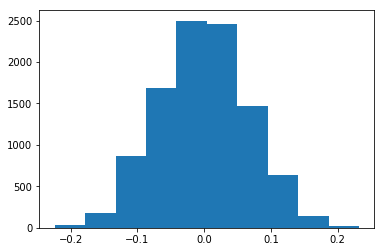

In [10]:
plt.hist(ts)

In [11]:
np.mean(ts>=obs)

0.001

Step 4: Conclusion

p value is low enough to conclude that the null hypothesis is incorrect and the virginica species does have a larger mean sepal width than that of versicolor.
